# ✅ 1. Prepare Environment


In [ ]:
%pip install opencv-python matplotlib numpy
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


his section imports the necessary libraries:

- OpenCV is used for image processing tasks.
- NumPy is useful for numerical operations and handling arrays.
- Matplotlib is used to display images directly in the notebook

### 🖼️ Load and Threshold Image




In [23]:
# Import image
original = cv2.imread('img\moto.jpg', cv2.IMREAD_GRAYSCALE)
threshold_value = 127
_, binary_image = cv2.threshold(original, threshold_value, 255, cv2.THRESH_BINARY)

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\danga\AppData\Local\Temp\ipykernel_24748\469299265.py:2: SyntaxWarning: invalid escape sequence '\m'
  original = cv2.imread('img\moto.jpg', cv2.IMREAD_GRAYSCALE)
C:\Users\danga\AppData\Local\Temp\ipykernel_24748\469299265.py:2: SyntaxWarning: invalid escape sequence '\m'
  original = cv2.imread('img\moto.jpg', cv2.IMREAD_GRAYSCALE)
C:\Users\danga\AppData\Local\Temp\ipykernel_24748\469299265.py:2: SyntaxWarning: invalid escape sequence '\m'
  original = cv2.imread('img\moto.jpg', cv2.IMREAD_GRAYSCALE)
C:\Users\danga\AppData\Local\Temp\ipykernel_24748\469299265.py:2: SyntaxWarning: invalid escape sequence '\m'
  original = cv2.imread('img\moto.jpg', cv2.IMREAD_GRAYSCALE)
C:\Users\danga\AppData\Local\Temp\ipykernel_24748\469299265.py:2: SyntaxWarning: invalid escape sequence '\m'
  original = cv2.imread('img\moto.jpg', cv2.IMREAD_GRAYSCALE)


In this part, an image named `moto.jpg` is loaded in grayscale mode from the `/content/` directory. Grayscale simplifies the image to a single intensity channel, making further processing easier.

Then, a binary threshold is applied: all pixel values greater than a certain threshold (e.g., 127) are set to white, and the rest are set to black. This results in a binarized image, ideal for contour detection.



### 🖥️ Define Display Function

A function is defined to display images using Matplotlib:

- The image is shown in grayscale color mapping.
- The axis is turned off to avoid showing ticks or gridlines.
- The image is rendered in the output cell for visualization.

In [24]:
# Display Image
def display(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

## ✅ Image before and after binarization

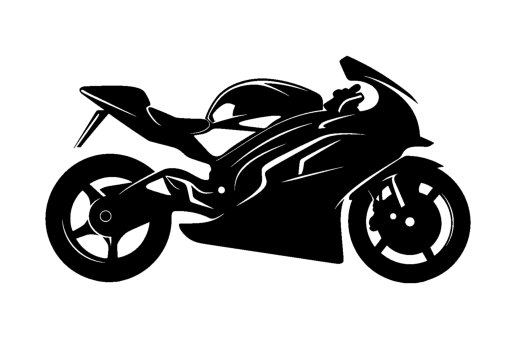

In [25]:
display(binary_image)

### 🔍 Contour Detection and Visualization

This section performs contour detection on a binarized image and visualizes the results:

- The binary image is first inverted to ensure that the object (usually dark) appears white, which is the required format for `cv2.findContours`.
- External contours are then detected using OpenCV's contour-finding function.
- A color version of the binary image is created to allow colored drawing (e.g., red contours).
- The detected contours are drawn on this color image using red outlines for visibility.
- Finally, the image with the highlighted contours is displayed to visualize the detected shapes.


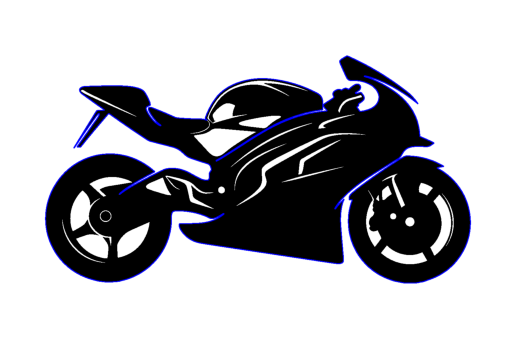

In [26]:
inverted_image = cv2.bitwise_not(binary_image) # Invert the image (optional, but helps if the object is black)

found_contours, _ = cv2.findContours(inverted_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # Detect contours on the inverted image

contour_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR) # Create a color copy of the original to draw contours

cv2.drawContours(contour_image, found_contours, -1, (0, 0, 255), 2) # Draw the red contours

display(contour_image) # Display the result

### 📐 Contour Property Calculation

In this part of the process, each detected contour is analyzed individually:

- The **area** of the contour is calculated to measure the number of pixels inside the shape.
- The **perimeter** (arc length) is computed to measure the contour's boundary length.
- **Image moments** are extracted to derive properties like the centroid (geometric center).
- The **centroid coordinates** are calculated using the first-order moments, with a check to avoid division by zero when the area is zero.
- The calculated properties (area, perimeter, and centroid) are printed for each contour, enabling quantitative analysis of the shapes in the image.




In [27]:
# Iterate through each detected contour
for i, contour in enumerate(found_contours):

    # Calculate the area of the contour
    area = cv2.contourArea(contour)

    # Calculate the perimeter (arc length), assuming the contour is closed
    perimeter = cv2.arcLength(contour, closed=True)

    # Compute image moments (used to extract properties like centroid)
    M = cv2.moments(contour)

    # Compute the centroid (only if the area is non-zero to avoid division by zero)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0

    # Display results for this contour
    print(f'Contour {i+1}:')
    print(f'  Area: {area}')
    print(f'  Perimeter: {perimeter}')
    print(f'  Centroid: ({cx}, {cy})\n')

Contour 1:
  Area: 110160.0
  Perimeter: 1299.6509228944778
  Centroid: (1221, 647)

Contour 2:
  Area: 447101.0
  Perimeter: 7585.170481681824
  Centroid: (671, 502)



### 🏷️ Labeling Contours with Geometric Properties

This section adds informative text labels directly on the image for each detected contour:

- A copy of the image is created to preserve the original and allow drawing.
- For each contour, the **area**, **perimeter**, and **centroid** are calculated.
- A label string is created that includes the area, perimeter, and centroid coordinates.
- This label is drawn near the centroid of the shape using OpenCV’s `putText` function.
- The text is styled with a readable font and green color to stand out over the image.
- The final result is a labeled image where each shape includes its measured properties.


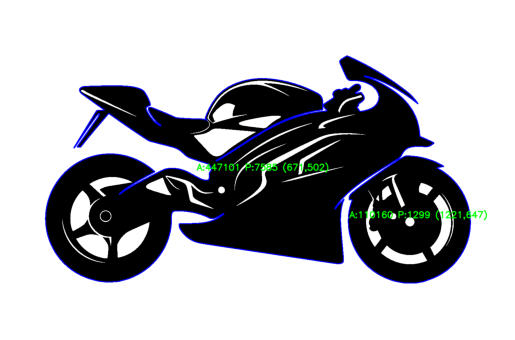

In [29]:
# Make a copy of the image to draw labels on
labeled_image = contour_image.copy()

# Loop through each detected contour
for i, contour in enumerate(found_contours):

    # Compute the area of the contour
    area = cv2.contourArea(contour)

    # Compute the perimeter (arc length)
    perimeter = cv2.arcLength(contour, closed=True)

    # Compute the moments to find the centroid
    M = cv2.moments(contour)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0

    # Generate the label text with area, perimeter, and centroid
    label = f"A:{int(area)} P:{int(perimeter)} ({cx},{cy})"

    # Draw the label near the centroid position on the image
    cv2.putText(
        labeled_image, label, (cx - int(cx * 0.15), cy - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255, 0), 2, cv2.LINE_AA
    )

# Show the final labeled image
display(labeled_image)


### 💾 Saving the Output Images

This final step saves the different stages of image processing for future use or documentation:

- The **binarized image** is saved as `'binarizada.jpg'`, showing the result of thresholding.
- The **contour image** is saved as `'contornos.jpg'`, displaying the detected contours.
- The **labeled image** is saved as `'contornosetiquetados.jpg'`, including contour labels with area, perimeter, and centroid coordinates.

All images are saved in the `img/` directory, making it easier to organize the outputs of the processing pipeline.


In [30]:
cv2.imwrite('img/binarizada.jpg', binary_image)
cv2.imwrite('img/contornos.jpg', contour_image)
cv2.imwrite('img/contornosetiquetados.jpg', labeled_image)

True